In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (precision_recall_curve,
                           classification_report,
                           confusion_matrix,
                           ConfusionMatrixDisplay,
                           RocCurveDisplay,
                           roc_auc_score)


In [2]:
df = pd.read_csv(r"C:\Users\afrat\Downloads\hotel_booking (1).csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
median_children = df['children'].median()

print(f"The median number of children is: {median_children}")


The median number of children is: 0.0


In [5]:
df['children'] = df.groupby('hotel')['children'].transform(lambda x: x.fillna(x.median()))

df['children_missing'] = df['children'].isnull().astype(int)

print(df[df['children'].isnull()].shape)

(0, 37)


In [6]:

df.drop(columns=['reservation_status_date','reservation_status'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'name',
       'email', 'phone-number', 'credit_card', 'children_missing'],
      dtype='object')


In [7]:
df.drop(columns=['email','phone-number','name'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing'],
      dtype='object')


In [8]:
mean_adr = df['adr'].mean()
median_adr = df['adr'].median()

# df['adr'] = df['adr'].apply(lambda x: mean_adr if x < 0 else x) 
df['adr'] = df['adr'].apply(lambda x: median_adr if x < 0 else x) 

In [9]:
df = df[(df['children'] != 10) & (df['babies'] != 10)]

In [10]:
df = df[df['adults'] > 0]

In [11]:
print(df['adults'].describe())

count    118985.000000
mean          1.862689
std           0.570064
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          55.000000
Name: adults, dtype: float64


In [12]:
df.drop(columns=['company'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing'],
      dtype='object')


In [13]:
df.drop(columns=['agent'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'credit_card', 'children_missing'],
      dtype='object')


In [14]:
df.drop(columns=['credit_card'], inplace=True)

print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing'],
      dtype='object')


In [15]:
df.drop(columns=['country'], inplace=True)
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'children_missing'],
      dtype='object')


In [16]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type'],
      dtype='object')


In [17]:
non_categorical_columns = df.select_dtypes(include=['int64', 'float64', 'datetime64[ns]']).columns

print(non_categorical_columns)

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   stays_in_weekend_nights         118985 non-null  int64  
 8   stays_in_week_nights            118985 non-null  int64  
 9   adults                          118985 non-null  int64  
 10  children                        118985 non-null  float64
 11  babies                          118985 non-null  int64  
 12  meal                 

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_year               118985 non-null  int64  
 4   arrival_date_month              118985 non-null  object 
 5   arrival_date_week_number        118985 non-null  int64  
 6   arrival_date_day_of_month       118985 non-null  int64  
 7   stays_in_weekend_nights         118985 non-null  int64  
 8   stays_in_week_nights            118985 non-null  int64  
 9   adults                          118985 non-null  int64  
 10  children                        118985 non-null  float64
 11  babies                          118985 non-null  int64  
 12  meal                 

In [20]:
df = df.drop('arrival_date_week_number', axis=1)

In [21]:
df = df.drop('arrival_date_year', axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118985 non-null  object 
 1   is_canceled                     118985 non-null  int64  
 2   lead_time                       118985 non-null  int64  
 3   arrival_date_month              118985 non-null  object 
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  meal                            118985 non-null  object 
 11  market_segment                  118985 non-null  object 
 12  distribution_channel 

In [23]:
df['arrival_month_sin'] = np.sin(2*np.pi*(pd.to_datetime(df['arrival_date_month'], format='%B').dt.month-1)/12)
df['arrival_month_cos'] = np.cos(2*np.pi*(pd.to_datetime(df['arrival_date_month'], format='%B').dt.month-1)/12)
df = df.drop('arrival_date_month', axis=1)

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df_encoded = pd.get_dummies(df[categorical_cols], drop_first=True).astype(float)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols].astype(float)

df_encoded['booking_type'] = np.select(
    [
        (df_encoded['market_segment_Online TA'] == 1),
        (df_encoded['market_segment_Offline TA/TO'] == 1),
        (df_encoded['market_segment_Groups'] == 1)
    ],
    [1, 2, 3], 
    default=0
)

\df_encoded['transient_online'] = df_encoded['customer_type_Transient'] * df_encoded['market_segment_Online TA']

cols_to_drop = [
    'market_segment_Online TA',
    'market_segment_Offline TA/TO',
    'market_segment_Groups',
    'distribution_channel_TA/TO',
    'customer_type_Transient',
    'customer_type_Transient-Party'
]
df_encoded = df_encoded.drop(cols_to_drop, axis=1)

X = pd.concat([df_numerical, df_encoded], axis=1)

def clean_for_vif(df):
    """Ensure dataframe is suitable for VIF calculation"""
    df = df.apply(pd.to_numeric, errors='coerce')
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.fillna(df.mean())
    return df.loc[:, df.std() > 0]

X_clean = clean_for_vif(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_clean.values, i)
                  for i in range(X_clean.shape[1])]

vif_sorted = vif_data.sort_values('VIF', ascending=False)
print(vif_sorted)

good_features = vif_sorted[vif_sorted['VIF'] < 10]['feature']
X_final = X_clean[good_features]

print("\nFinal features with VIF < 10:")
print(X_final.columns.tolist())

                           feature        VIF
5                           adults  12.062203
13                             adr   9.279409
25           market_segment_Direct   8.673445
51                    booking_type   8.669596
27     distribution_channel_Direct   7.140191
35            reserved_room_type_G   5.170260
36            reserved_room_type_H   5.057604
44            assigned_room_type_H   5.007649
43            assigned_room_type_G   4.999093
52                transient_online   4.570880
2        arrival_date_day_of_month   4.062088
4             stays_in_week_nights   3.897168
41            assigned_room_type_E   3.856525
33            reserved_room_type_E   3.835766
34            reserved_room_type_F   3.775583
42            assigned_room_type_F   3.658790
40            assigned_room_type_D   3.549952
32            reserved_room_type_D   3.353998
1                        lead_time   3.193648
3          stays_in_weekend_nights   2.555963
0                      is_canceled

In [25]:
from sklearn.model_selection import train_test_split

y = X_final['is_canceled'] 
X_final = X_final.drop('is_canceled', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.3, random_state=42, stratify=y
)

In [26]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118985 entries, 0 to 119389
Data columns (total 51 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   adr                             118985 non-null  float64
 1   market_segment_Direct           118985 non-null  float64
 2   booking_type                    118985 non-null  int32  
 3   distribution_channel_Direct     118985 non-null  float64
 4   reserved_room_type_G            118985 non-null  float64
 5   reserved_room_type_H            118985 non-null  float64
 6   assigned_room_type_H            118985 non-null  float64
 7   assigned_room_type_G            118985 non-null  float64
 8   transient_online                118985 non-null  float64
 9   arrival_date_day_of_month       118985 non-null  float64
 10  stays_in_week_nights            118985 non-null  float64
 11  assigned_room_type_E            118985 non-null  float64
 12  reserved_room_type_E 

In [27]:
model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=15,
    min_samples_leaf=2,
    min_samples_split=5,
    max_features=0.6,
    class_weight={0: 1, 1: 2},
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

train_probs = model.predict_proba(X_train)[:, 1]
test_probs = model.predict_proba(X_test)[:, 1]

precision_train, recall_train, thresholds_train = precision_recall_curve(y_train, train_probs)
f1_scores_train = (2 * precision_train * recall_train) / (precision_train + recall_train + 1e-10)
optimal_idx_train = np.argmax(f1_scores_train[:-1])
optimal_threshold_train = thresholds_train[optimal_idx_train]

train_pred = (train_probs >= optimal_threshold_train).astype(int)
test_pred = (test_probs >= optimal_threshold_train).astype(int)

print("\n=== MODEL PERFORMANCE ===")
print(f"Optimal Threshold (from train set): {optimal_threshold_train:.2f}\n")

print("\nTRAIN SET PERFORMANCE:")
print("Classification Report:")
print(classification_report(y_train, train_pred))
print("\nConfusion Matrix (Counts):")
print(confusion_matrix(y_train, train_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_train, train_probs):.2f}")

print("\n\nTEST SET PERFORMANCE:")
print("Classification Report:")
print(classification_report(y_test, test_pred))
print("\nConfusion Matrix (Counts):")
print(confusion_matrix(y_test, test_pred))
print(f"\nROC-AUC Score: {roc_auc_score(y_test, test_probs):.2f}")


def get_metrics(y_true, y_pred, probs):
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'precision_0': report['0.0']['precision'],
        'precision_1': report['1.0']['precision'],
        'recall_0': report['0.0']['recall'],
        'recall_1': report['1.0']['recall'],
        'f1_0': report['0.0']['f1-score'],
        'f1_1': report['1.0']['f1-score'],
        'accuracy': report['accuracy'],
        'roc_auc': roc_auc_score(y_true, probs)
    }

train_metrics = get_metrics(y_train, train_pred, train_probs)
test_metrics = get_metrics(y_test, test_pred, test_probs)

print("\n=== COMPARISON METRICS ===")
print(f"{'Metric':<20} {'Train':<10} {'Test':<10}")
print("-" * 40)
print(f"{'Precision (Class 0)':<20} {train_metrics['precision_0']:.2f} {test_metrics['precision_0']:.2f}")
print(f"{'Precision (Class 1)':<20} {train_metrics['precision_1']:.2f} {test_metrics['precision_1']:.2f}")
print(f"{'Recall (Class 0)':<20} {train_metrics['recall_0']:.2f} {test_metrics['recall_0']:.2f}")
print(f"{'Recall (Class 1)':<20} {train_metrics['recall_1']:.2f} {test_metrics['recall_1']:.2f}")
print(f"{'F1-Score (Class 0)':<20} {train_metrics['f1_0']:.2f} {test_metrics['f1_0']:.2f}")
print(f"{'F1-Score (Class 1)':<20} {train_metrics['f1_1']:.2f} {test_metrics['f1_1']:.2f}")
print("-" * 40)
print(f"{'Accuracy':<20} {train_metrics['accuracy']:.2f} {test_metrics['accuracy']:.2f}")
print(f"{'ROC-AUC':<20} {train_metrics['roc_auc']:.2f} {test_metrics['roc_auc']:.2f}")


=== MODEL PERFORMANCE ===
Optimal Threshold (from train set): 0.49


TRAIN SET PERFORMANCE:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.87      0.89     52409
         1.0       0.80      0.85      0.82     30880

    accuracy                           0.86     83289
   macro avg       0.85      0.86      0.86     83289
weighted avg       0.87      0.86      0.86     83289


Confusion Matrix (Counts):
[[45805  6604]
 [ 4756 26124]]

ROC-AUC Score: 0.94


TEST SET PERFORMANCE:
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.85      0.86     22462
         1.0       0.76      0.80      0.78     13234

    accuracy                           0.83     35696
   macro avg       0.82      0.83      0.82     35696
weighted avg       0.84      0.83      0.83     35696


Confusion Matrix (Counts):
[[19066  3396]
 [ 2587 10647]]

ROC-AUC Score: 0.91

=== COMPARISON METRICS

<Figure size 600x600 with 0 Axes>

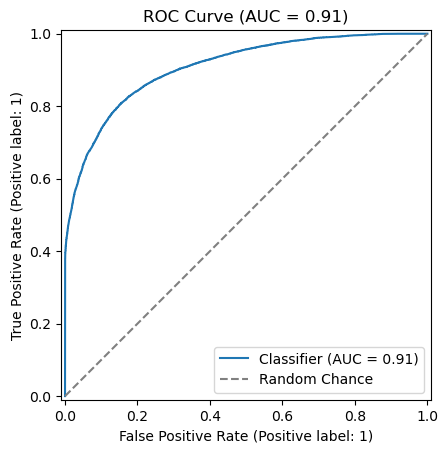

In [28]:
plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(y_test, test_probs)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Chance')
plt.title(f"ROC Curve (AUC = {test_metrics['roc_auc']:.2f})")
plt.legend()
plt.show()

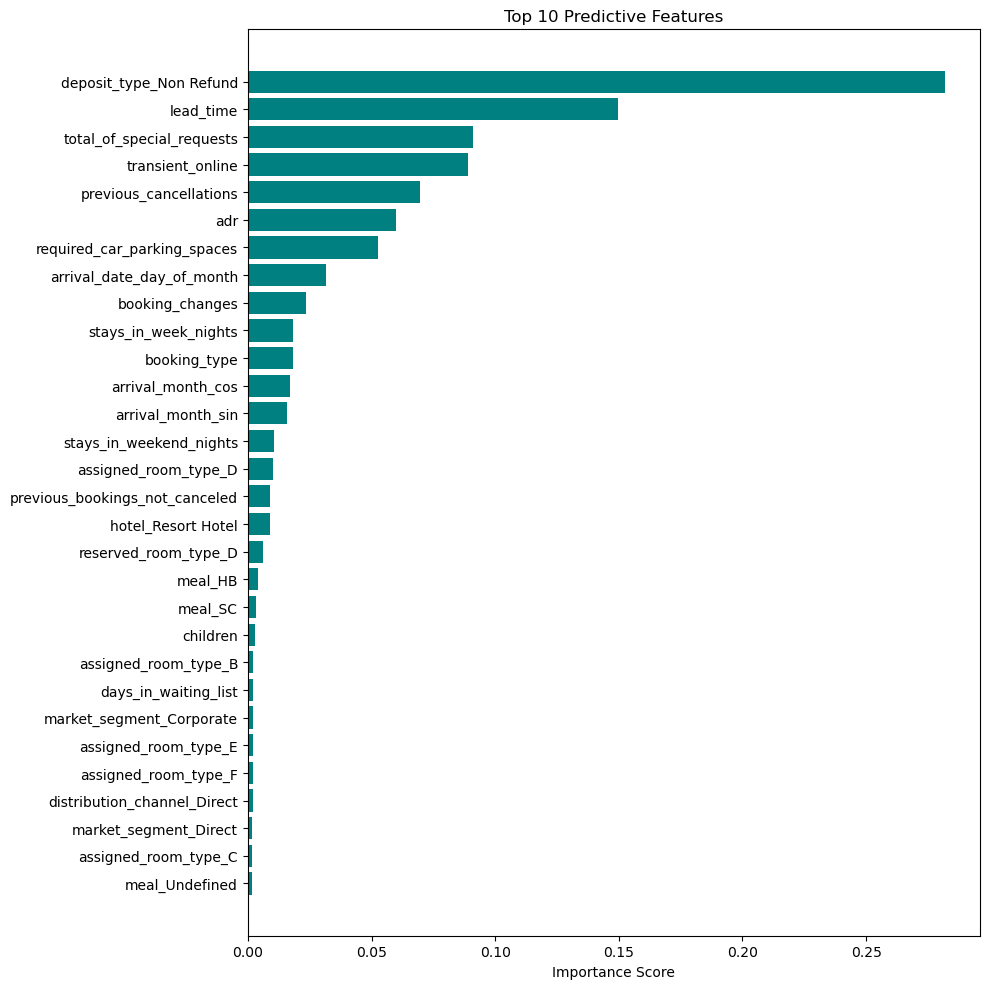

In [29]:
plt.figure(figsize=(10, 10))
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False).head(30)

plt.barh(importances['Feature'], importances['Importance'], color='teal')
plt.title('Top 10 Predictive Features')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

<Figure size 600x600 with 0 Axes>

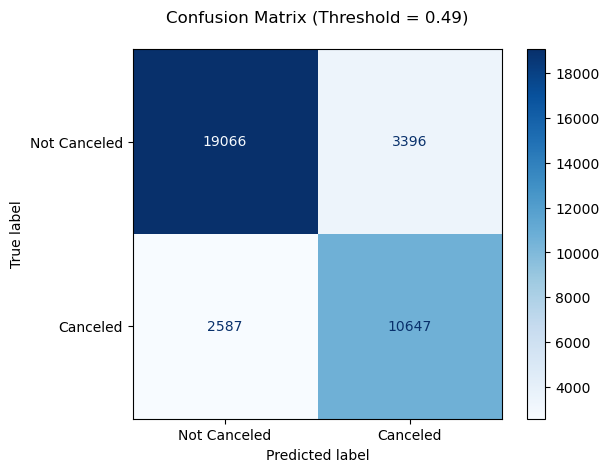

Confusion Matrix Values:
True Negatives (TN): 19066
False Positives (FP): 3396
False Negatives (FN): 2587
True Positives (TP): 10647


In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6, 6))
cm = confusion_matrix(y_test, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Not Canceled', 'Canceled'])
disp.plot(cmap='Blues', values_format='d') 
plt.title(f"Confusion Matrix (Threshold = {optimal_threshold_train:.2f})", pad=20)
plt.grid(False)  
plt.show()

print("Confusion Matrix Values:")
print(f"True Negatives (TN): {cm[0,0]}")
print(f"False Positives (FP): {cm[0,1]}")
print(f"False Negatives (FN): {cm[1,0]}")
print(f"True Positives (TP): {cm[1,1]}")

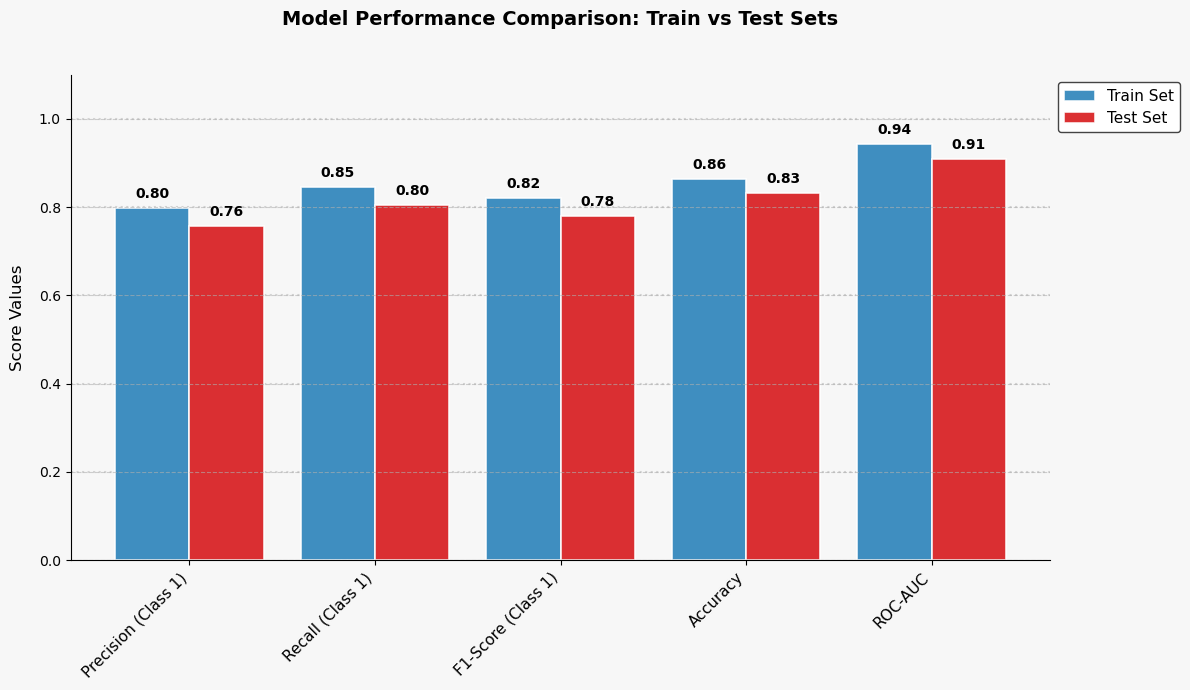

In [31]:
import matplotlib.pyplot as plt
import numpy as np

metrics_to_compare = ['precision_1', 'recall_1', 'f1_1', 'accuracy', 'roc_auc']
metric_names = ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 'Accuracy', 'ROC-AUC']

train_values = [train_metrics[m] for m in metrics_to_compare]
test_values = [test_metrics[m] for m in metrics_to_compare]

train_color = '#2b83ba' 
test_color = '#d7191c'   
background_color = '#f7f7f7'

x = np.arange(len(metric_names))
width = 0.4

fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)
rects1 = ax.bar(x - width/2, train_values, width, 
                label='Train Set', color=train_color,
                edgecolor='white', linewidth=1.2, alpha=0.9)
rects2 = ax.bar(x + width/2, test_values, width, 
                label='Test Set', color=test_color,
                edgecolor='white', linewidth=1.2, alpha=0.9)

ax.set_ylabel('Score Values', fontsize=12, labelpad=10)
ax.set_title('Model Performance Comparison: Train vs Test Sets\n', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metric_names, rotation=45, ha='right', fontsize=11)
ax.set_ylim(0, 1.1) 
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

ax.legend(frameon=True, framealpha=1, 
          facecolor='white', edgecolor='#444444',
          bbox_to_anchor=(1, 1), fontsize=11)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

autolabel(rects1)
autolabel(rects2)

for y in np.arange(0.2, 1.1, 0.2):
    ax.axhline(y, color='gray', linestyle=':', alpha=0.3, zorder=0)

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

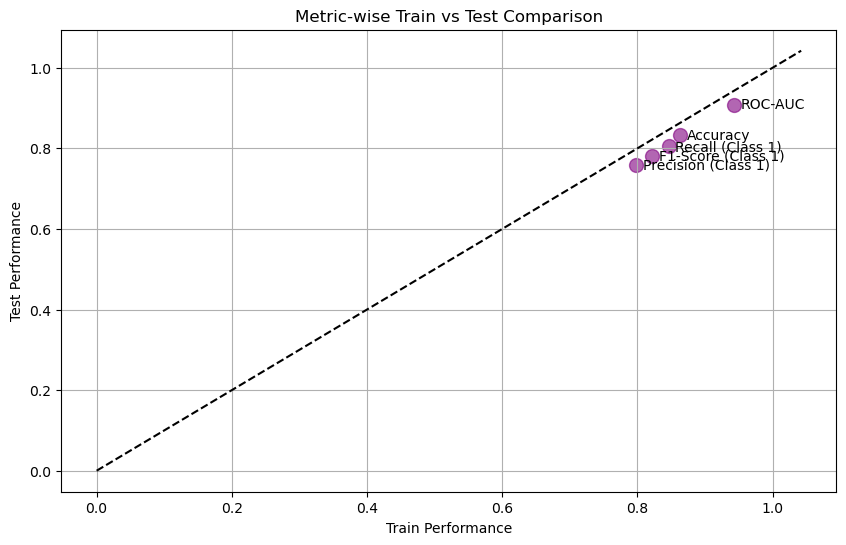

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(train_values, test_values, c='purple', s=100, alpha=0.6)
max_val = max(max(train_values), max(test_values)) + 0.1
plt.plot([0, max_val], [0, max_val], 'k--')

for i, txt in enumerate(metric_names):
    plt.annotate(txt, (train_values[i]+0.01, test_values[i]-0.01))

plt.xlabel('Train Performance')
plt.ylabel('Test Performance')
plt.title('Metric-wise Train vs Test Comparison')
plt.grid(True)
plt.show()

In [33]:

# param_grid = {
#     'n_estimators': [100, 150],
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [10, 12, 15],
#     'min_samples_split': [5, 8, 10],
#     'min_samples_leaf': [2, 3],
#     'max_features': [0.6, 0.7, 'sqrt'],
#     'class_weight': [{0:1, 1:w} for w in [2, 3, 4]] + ['balanced']
# }

# rf = RandomForestClassifier(random_state=42, n_jobs=-1)  

# grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
# grid_search.fit(X_train, y_train)

# print(f"Best params: {grid_search.best_params_}")
# print(f"Best CV F1: {grid_search.best_score_:.3f}") 